# MVPA2

In [1]:
import numpy as np
import nibabel as nb
import pandas as pd
from nilearn import image
import matplotlib.pyplot as plt

# 참가자들 데이터 가져와 합치기

In [2]:
import os

# 경로, 참가자들 리스트
# 노트북 메모리 딸려서 조금만 가져오기
'''
'2207071', '2207141', '2207142', '2207143', '2207271', '2207272', '2207273',
          '2208041', '2208042', '2208043', '2208231', '2208232', '2208233', '2209022',
          '2209023', '2209222', '2209223', '2303101', '2303102', '2303103', '2303131',
          '2303132', '2303133', '2303161', '2303162', '2303163', '2303201', '2303202', '2303203'
'''

base_path = 'D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID{}/func/sub-ID{}_task-r1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
sub_ids = ['2207071', '2207141', '2207142', '2207143', '2207271', '2207272', '2207273',
          '2208041', '2208042', '2208043', '2208231', '2208232', '2208233', '2209022',
          '2209023']
len(sub_ids)

15

In [3]:
func_list = []

for sub_id in sub_ids:
    file_path = base_path.format(sub_id, sub_id)
    data = image.load_img(file_path)
    func_list.append(data)

In [4]:
func_list

In [5]:
# 합치기
func = image.concat_imgs(func_list)

In [6]:
# 275초 x 15명 : 4125초
func.shape

(65, 77, 65, 4125)

In [7]:
img_mean = image.mean_img(func)
img_mean.shape

(65, 77, 65)

# Onset 가져와 합치기

In [8]:
'''
, '2207272', '2207273',
          '2208041', '2208042', '2208043', '2208231', '2208232', '2208233', '2209022',
          '2209023', '2209222', '2209223', '2303101', '2303102', '2303103', '2303131',
          '2303132', '2303133', '2303161', '2303162', '2303163', '2303201', '2303202', '2303203'
'''

base_path = 'D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID{}/eve_files/sub-ID{}_task-r1_events.tsv'
sub_ids = ['2207071', '2207141', '2207142', '2207143', '2207271', '2207272', '2207273',
          '2208041', '2208042', '2208043', '2208231', '2208232', '2208233', '2209022',
          '2209023']

In [9]:
from scipy.interpolate import interp1d

onset_list = []

for sub_id in sub_ids:
    file_path = base_path.format(sub_id, sub_id)
    onset_file = pd.read_csv(file_path, sep='\t')

    events = onset_file['stim_onset'].values
    events1 = events.astype(int)

    predictor_all = np.zeros(550, dtype=int)
    predictor_all[events1.astype(int)] = 1

    original_scale = np.arange(0, 550, 1) # 0~550 초
    resampler = interp1d(original_scale, predictor_all)

    desired_scale = np.arange(0, 550, 2)
    y = resampler(desired_scale)

    onset_list.append(y)

In [10]:
onset_list

[array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 

In [11]:
onset_y = np.concatenate(onset_list)

In [12]:
onset_y = onset_y.ravel()

In [13]:
onset_y.shape

(4125,)

# 마스크 만들기

In [14]:
t1 = image.load_img('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-02_desc-brain_T1w.nii.gz')

In [15]:
# t1 이미지 해상도
t1.shape

(96, 114, 96)

In [16]:
# resample
img_resampled = image.resample_to_img(t1, func)
img_resampled.shape

(65, 77, 65)

In [17]:
from scipy.ndimage import binary_dilation
import nibabel as nb

# Binarize ROI template
# 데이터를 200이상인 값은 1로, 그외의 값 0으로 변환. # 값은 계속 돌려가며 한번 보자.
data_binary = np.array(img_resampled.get_fdata()>=200, dtype=np.int8)

# Dilate binary mask once
# 이진화된 데이터 팽창작엄.(마스크 확장해서 뇌영상 데이터에서 원하는 복셀 더 포함)
# data_dialted = binary_dilation(data_binary, iterations=1).astype(np.int8)

# Save binary mask in NIfTI image
# img_mask = nb.Nifti1Image(data_dialted, img_resampled.affine, img_resampled.header)
brain_mask = nb.Nifti1Image(data_binary, img_resampled.affine, img_resampled.header)
brain_mask.set_data_dtype('i1')

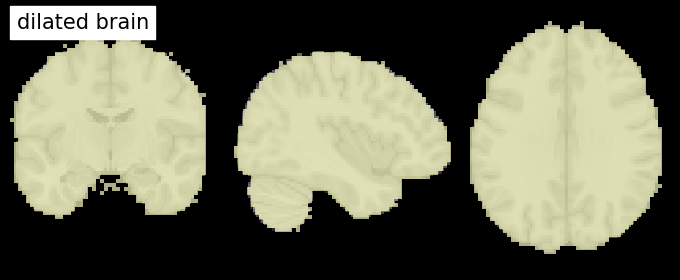

In [18]:
from nilearn.plotting import plot_roi
plot_roi(brain_mask, draw_cross=False, annotate=False, black_bg=True,
        bg_img=t1, cut_coords=[40,-10,30], title='dilated brain', cmap='magma_r', dim=1)

In [19]:
# atlas 가져오기
from nilearn.datasets import fetch_atlas_schaefer_2018
# 관심 roi 100구역, 공간 해상도 2mm
schaefer_parc = fetch_atlas_schaefer_2018(n_rois=100, resolution_mm=2, verbose=False)

atlas_label = schaefer_parc['labels']

In [20]:
atlas_label

array([b'7Networks_LH_Vis_1', b'7Networks_LH_Vis_2',
       b'7Networks_LH_Vis_3', b'7Networks_LH_Vis_4',
       b'7Networks_LH_Vis_5', b'7Networks_LH_Vis_6',
       b'7Networks_LH_Vis_7', b'7Networks_LH_Vis_8',
       b'7Networks_LH_Vis_9', b'7Networks_LH_SomMot_1',
       b'7Networks_LH_SomMot_2', b'7Networks_LH_SomMot_3',
       b'7Networks_LH_SomMot_4', b'7Networks_LH_SomMot_5',
       b'7Networks_LH_SomMot_6', b'7Networks_LH_DorsAttn_Post_1',
       b'7Networks_LH_DorsAttn_Post_2', b'7Networks_LH_DorsAttn_Post_3',
       b'7Networks_LH_DorsAttn_Post_4', b'7Networks_LH_DorsAttn_Post_5',
       b'7Networks_LH_DorsAttn_Post_6', b'7Networks_LH_DorsAttn_PrCv_1',
       b'7Networks_LH_DorsAttn_FEF_1',
       b'7Networks_LH_SalVentAttn_ParOper_1',
       b'7Networks_LH_SalVentAttn_FrOperIns_1',
       b'7Networks_LH_SalVentAttn_FrOperIns_2',
       b'7Networks_LH_SalVentAttn_PFCl_1',
       b'7Networks_LH_SalVentAttn_Med_1',
       b'7Networks_LH_SalVentAttn_Med_2',
       b'7Networks_LH

In [21]:
img_atlas = image.load_img(schaefer_parc['maps'])
img_atlas.shape

(91, 109, 91)

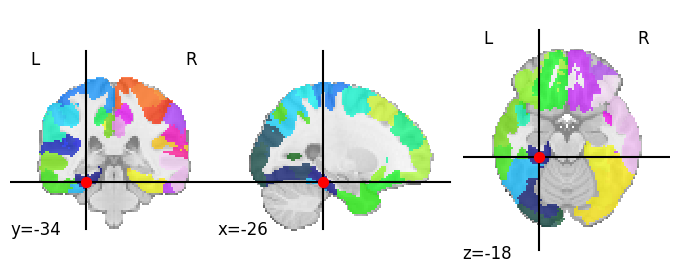

In [22]:
from nilearn import plotting

x, y, z = -26, -34, -18

display = plotting.plot_roi(img_atlas, cut_coords=(x, y, z))
display.add_markers(marker_coords=[(x,y,z)], marker_color='red', marker_size=50)

In [23]:
idx_vis = [1,2,3,4,5,6,7,8,9,51,52,53,54,55,56,57,58]

In [24]:
roi_ints = img_atlas.get_fdata()
np.unique(roi_ints)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [25]:
roi_ints[~np.isin(roi_ints, idx_vis)] = 0

In [26]:
new_img = image.new_img_like(img_atlas, roi_ints)

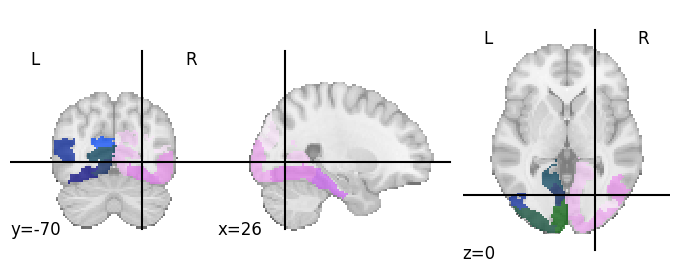

In [27]:
plot_roi(new_img)

In [28]:
# 0보다 큰 영역 선택
img_roi = image.math_img("img>0", img=new_img)

# resample
img_resampled = image.resample_to_img(img_roi, img_mean, interpolation='nearest')

# 마스크
mask_vis = image.math_img("((mean != 0)*img)>0.5", mean=img_mean, img = img_resampled)

In [29]:
mask_vis.shape

(65, 77, 65)

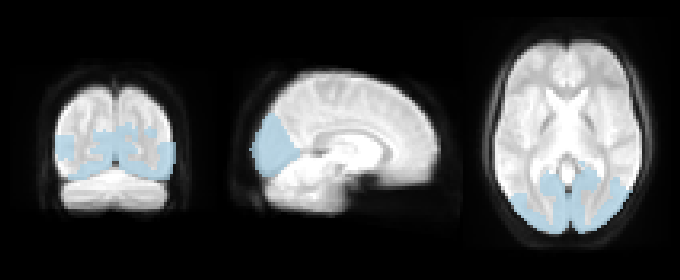

In [30]:
# Plotting Vis mask

plot_roi(mask_vis, img_mean, cmap='Paired', dim=-.5, draw_cross=False, annotate=False);

In [31]:
#labels = np.ravel([[['closed'] * 4, ['open'] * 4] for i in range(48)])
#labels.shape

In [43]:
# 참가자 29명 * 275 chunks

chunks = np.ravel([[i] * 275 for i in range(15)])
len(chunks)

4125

In [44]:
np.unique(chunks)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# ROI based decoding analysis

In [34]:
mask2use = mask_vis

In [35]:
# Mask ML dataset with Visual ROI mask
from nilearn.maskers import NiftiMasker
masker = NiftiMasker(mask_img=mask2use, standardize=False, detrend=False,
                     memory="nilearn_cache", memory_level=2)
samples = masker.fit_transform(func)
print(samples)

[[809.30347  513.6424   523.26697  ... 755.9336   876.8308    89.88121 ]
 [800.08246  504.70084  531.867    ... 752.1148   884.87195  110.310165]
 [804.14966  496.4734   508.1781   ... 754.878    866.0885    90.005394]
 ...
 [765.8383   709.5476   702.63416  ... 777.25916  758.58594  461.98373 ]
 [757.7726   690.1627   747.40234  ... 780.2076   766.6856   481.87695 ]
 [776.98804  708.3276   666.7111   ... 780.81757  759.33154  473.94678 ]]


In [36]:
# 7975초, 6725개 voxel
print(samples.shape)

(4125, 6725)


In [37]:
# unmasking 하기 x,y,z 형식으로 다시 만들기
masked_epi = masker.inverse_transform(samples)

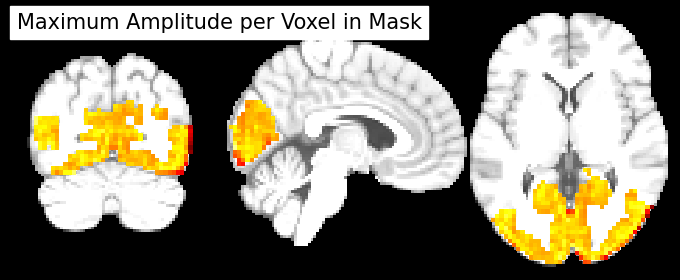

In [38]:
max_zscores = image.math_img("np.abs(img).max(axis=3)", img=masked_epi)
plotting.plot_stat_map(max_zscores, bg_img=t1, dim=-.5,
              draw_cross=False, annotate=False, colorbar=False,
              title='Maximum Amplitude per Voxel in Mask')

# linear SVC train, test with cv

In [42]:
print(samples.shape)
print(onset_y.shape)

(4125, 6725)
(4125,)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, c_train, c_test = train_test_split(
    samples, onset_y, chunks, test_size =0.2, random_state=42, shuffle=False)

In [46]:
print('Shapes of X:', X_train.shape, X_test.shape)
print('Shapes of y:', y_train.shape, y_test.shape)

Shapes of X: (3300, 6725) (825, 6725)
Shapes of y: (3300,) (825,)


In [47]:
# vis ROI linear SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [48]:
# Create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', LinearSVC(multi_class='ovr', penalty='l2',
                      loss='squared_hinge', max_iter=500))
])

In [49]:
grid = {
    'svc__C' : np.logspace(-6, 2, num=20)
}

In [50]:
os.cpu_count()

12

In [51]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
grid_cv_v1 = GridSearchCV(pipe, grid, cv=kf,
                          return_train_score=True, refit=True, n_jobs=11, verbose=1)

In [52]:
# Train the model and find optimal hyperparameter
grid_cv_v1.fit(X=X_train, y=y_train, groups=c_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', LinearSVC(max_iter=500))]),
             n_jobs=11,
             param_grid={'svc__C': array([1.00000000e-06, 2.63665090e-06, 6.95192796e-06, 1.83298071e-05,
       4.83293024e-05, 1.27427499e-04, 3.35981829e-04, 8.85866790e-04,
       2.33572147e-03, 6.15848211e-03, 1.62377674e-02, 4.28133240e-02,
       1.12883789e-01, 2.97635144e-01, 7.84759970e-01, 2.06913808e+00,
       5.45559478e+00, 1.43844989e+01, 3.79269019e+01, 1.00000000e+02])},
             return_train_score=True, verbose=1)

In [63]:
from IPython.display import display
def plot_hyperparam_fitting(cv_results):

    # Store grid search parameters and outcomes in dataframe
    df_pred = pd.DataFrame(cv_results)
    columns = [c for c in df_pred.columns if 'time' not in c
               and 'split' not in c
               and 'rank' not in c
               and c!='params']
    df_pred = df_pred[columns].sort_values('mean_test_score', ascending=False)
    display(df_pred.head())
    
    # Plot the model fit information
    df_plot = df_pred.sort_values('param_svc__C')

    # Exsract relevant modelling metrics
    train_scores = df_plot['mean_train_score']
    valid_scores = df_plot['mean_test_score']
    std_tr = df_plot['std_train_score']
    std_va = df_plot['std_test_score']

    plt.figure(figsize=(12, 4))
    Cs = df_plot['param_svc__C']
    plt.semilogx(Cs, train_scores, label='Training Set')
    plt.semilogx(Cs, valid_scores, label='Validation Set')

    # Add marker and text for best score
    max_id = np.argmax(valid_scores)
    x_pos = Cs.iloc[max_id]
    y_pos = valid_scores.iloc[max_id]
    txt = '{:0.4f}'.format(y_pos)
    plt.scatter(x_pos, y_pos, marker='x', c='red', zorder=10)
    plt.text(x_pos, y_pos, txt, fontdict={'size': 18})

    # Quantify variance with ±std curves
    plt.fill_between(Cs.astype(float), train_scores-std_tr, train_scores+std_tr, alpha=0.3)
    plt.fill_between(Cs.astype(float), valid_scores-std_va, valid_scores+std_va, alpha=0.3)
    plt.ylabel('Performance metric')
    plt.xlabel('Model parameter')

    # Adjust x-lim, y-lim, add legend and adjust layout
    plt.legend()
    plt.show()

,param_svc__C,mean_test_score,std_test_score,mean_train_score,std_train_score
5,0.000127,0.683939,0.110507,0.793485,0.001831
13,0.297635,0.683333,0.114544,0.990227,0.003917
11,0.042813,0.682424,0.112353,0.993864,0.003776
12,0.112884,0.682424,0.109161,0.985530,0.012541
18,37.926902,0.682121,0.109273,0.981439,0.017204


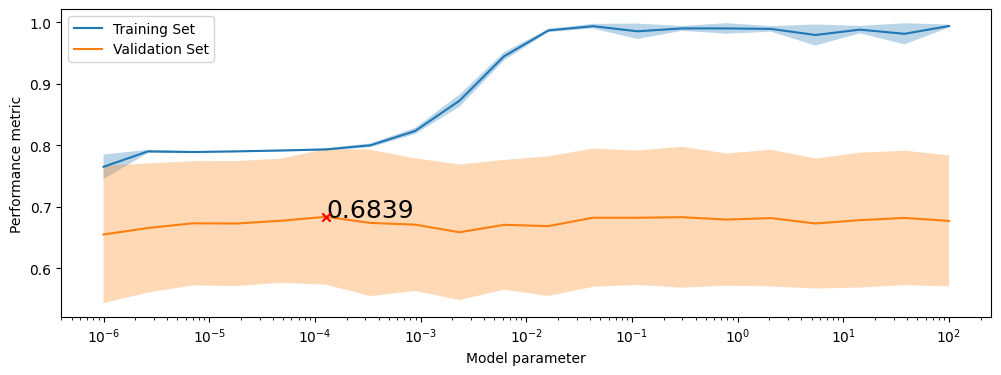

In [64]:
# Plot hyperparameter fine tuning outcome
plot_hyperparam_fitting(grid_cv_v1.cv_results_)

In [65]:
score_test = grid_cv_v1.score(X_test, y_test)
print('Test score based on Vis:', score_test)

Test score based on Vis: 0.6315151515151515


In [66]:
pred = grid_cv_v1.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confusion = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)

print('혼동행렬 : \n',
      confusion)
print(f"정화도 : {accuracy:.4f}, 민감도 : {recall:.4f}, 정밀도 : {precision:.4f}")

혼동행렬 : 
 [[468 177]
 [127  53]]
정화도 : 0.6315, 민감도 : 0.2944, 정밀도 : 0.2304


# Permutation testing 

In [67]:
from sklearn.model_selection import permutation_test_score

# Get best classifier from gridsearch
clf = grid_cv_v1.best_estimator_

# Run the permuation cross-validation
null_cv_scores = permutation_test_score(estimator=clf,
                                        X=samples,
                                        y=onset_y,
                                        groups=chunks,
                                        cv=kf,
                                        n_permutations=200,
                                        n_jobs=10,
                                        verbose=1)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  9.0min
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:  9.9min finished


In [68]:
null_cv_scores

(0.6952727272727273,
 array([0.71248485, 0.7529697 , 0.77987879, 0.71539394, 0.70666667,
        0.67684848, 0.71369697, 0.76509091, 0.73454545, 0.78181818,
        0.74448485, 0.74181818, 0.70666667, 0.69309091, 0.76581818,
        0.7430303 , 0.7449697 , 0.71418182, 0.67539394, 0.75806061,
        0.78036364, 0.74206061, 0.74424242, 0.74836364, 0.77018182,
        0.74278788, 0.77793939, 0.78133333, 0.74424242, 0.71393939,
        0.74448485, 0.70666667, 0.74739394, 0.74424242, 0.77915152,
        0.7689697 , 0.71418182, 0.74351515, 0.71030303, 0.704     ,
        0.74472727, 0.73381818, 0.78181818, 0.75806061, 0.77842424,
        0.69818182, 0.72727273, 0.77212121, 0.78181818, 0.74424242,
        0.78036364, 0.70884848, 0.76775758, 0.744     , 0.70642424,
        0.77454545, 0.78181818, 0.73042424, 0.74424242, 0.73793939,
        0.74448485, 0.73430303, 0.77721212, 0.70739394, 0.78181818,
        0.78181818, 0.71030303, 0.74448485, 0.74375758, 0.78181818,
        0.77478788, 0.73745

Red line indicates accuracy of actual labels.
Prediction accuracy: 69.53
p-value: 0.9403


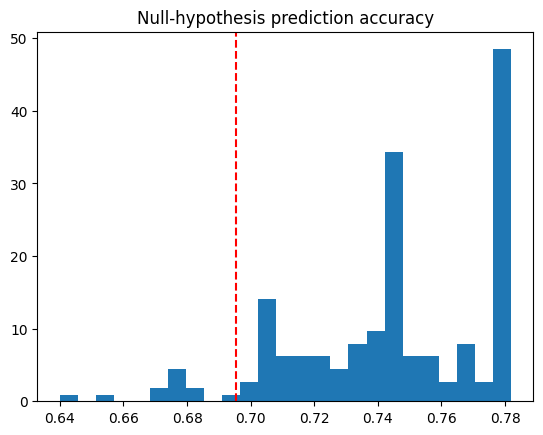

In [86]:
# Plotting the null distribution
plt.title('Null-hypothesis prediction accuracy')
plt.hist(null_cv_scores[1], bins=25, density=True);
plt.axvline(null_cv_scores[0], color='r', ls='--')
print('Red line indicates accuracy of actual labels.')

print('Prediction accuracy: %.02f' % (null_cv_scores[0] * 100),
      'p-value: %.04f' % (null_cv_scores[2]),
      sep='\n')

# Searchlight

In [70]:
mask = brain_mask

In [71]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [72]:
sphere_radius = 8

In [73]:
from nilearn.decoding import SearchLight
sl = SearchLight(mask,
                 process_mask_img=mask,
                 radius=sphere_radius,
                 estimator=clf,
                 cv=kf,
                 n_jobs=-1,
                 verbose=1)

In [74]:
sl.fit(func, onset_y, groups=chunks)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:  4.0min remaining: 20.1min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.5min finished


SearchLight(cv=KFold(n_splits=5, random_state=None, shuffle=False),
            estimator=GaussianNB(),
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x000001D99921A820>,
            n_jobs=-1,
            process_mask_img=<nibabel.nifti1.Nifti1Image object at 0x000001D99921A820>,
            radius=8, verbose=1)

In [75]:
from nilearn.image import new_img_like
searchlight_img = new_img_like(func, sl.scores_)

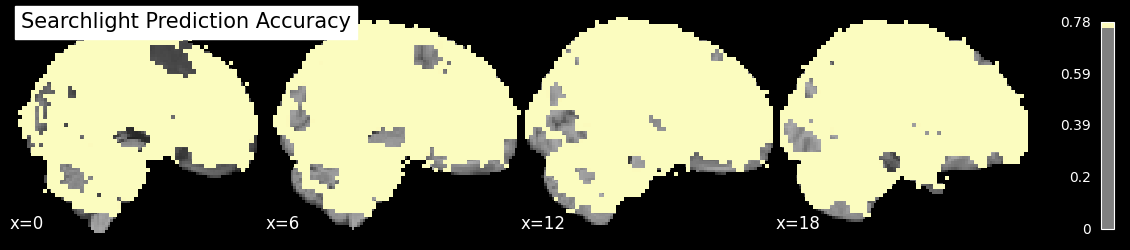

In [80]:
from nilearn.plotting import plot_stat_map
plot_stat_map(searchlight_img, cmap='magma', bg_img=t1, colorbar=True,
              display_mode='x', threshold=0.77, cut_coords=[0, 6, 12, 18],
              title='Searchlight Prediction Accuracy');